In [ ]:
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

In [ ]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."

 done.


In [ ]:
!wget -q https://raw.githubusercontent.com/anshupandey/Computer-Vision/master/multi.csv

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

In [ ]:
df = pd.read_pickle("multi.csv")
df.head(20)

In [ ]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
len(voc_classes)

20

In [ ]:
x = []
y = []
for i in range(df.shape[0]):
  img_path = "/content/VOCdevkit/VOC2007/JPEGImages/"+df['fn'][i]
  img = image.load_img(img_path,target_size=(200,200))
  img = image.img_to_array(img)
  x.append(img)
  y.append(df['cat_id'][i])

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2501, 200, 200, 3)
(2501, 20)


In [ ]:
from tensorflow.keras import models,layers
input_layer = layers.Input(shape=(200,200,3))
resnet = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)

last_layer = resnet.layers[-1].output
flatten = layers.Flatten()(last_layer)
dense1 = layers.Dense(1000,activation='relu')(flatten)
dense2 = layers.Dense(600,activation='relu')(dense1)
output_layer = layers.Dense(20,activation='sigmoid')(dense2)

model = models.Model(inputs=input_layer,outputs=output_layer)

for layer in model.layers[:-8]:
  layer.trainable=False

model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,verbose=True,epochs=20,batch_size=32,validation_split=0.2,shuffle=True)

Epoch 1/20
63/63 [==============================] - 6s 95ms/step - loss: 0.9744 - accuracy: 0.3910 - val_loss: 0.1586 - val_accuracy: 0.5150
Epoch 2/20
63/63 [==============================] - 5s 79ms/step - loss: 0.0431 - accuracy: 0.7390 - val_loss: 0.1779 - val_accuracy: 0.5509
Epoch 3/20
63/63 [==============================] - 5s 79ms/step - loss: 0.0076 - accuracy: 0.7715 - val_loss: 0.1820 - val_accuracy: 0.5389
Epoch 4/20
63/63 [==============================] - 5s 78ms/step - loss: 0.0014 - accuracy: 0.7730 - val_loss: 0.2076 - val_accuracy: 0.5429
Epoch 5/20
63/63 [==============================] - 5s 79ms/step - loss: 4.9846e-04 - accuracy: 0.7630 - val_loss: 0.2198 - val_accuracy: 0.5569
Epoch 6/20
63/63 [==============================] - 5s 79ms/step - loss: 2.5701e-04 - accuracy: 0.7630 - val_loss: 0.2291 - val_accuracy: 0.5509
Epoch 7/20
63/63 [==============================] - 5s 79ms/step - loss: 1.8270e-04 - accuracy: 0.7585 - val_loss: 0.2354 - val_accuracy: 0.5529
E

In [ ]:
!wget -q http://www.horsefeedblog.com/wp-content/uploads/2010/06/walking-horse-and-dog.jpg

In [ ]:
!wget -q https://lifedesigncolorado.files.wordpress.com/2014/11/wood-run-10-19-erin-14.jpg

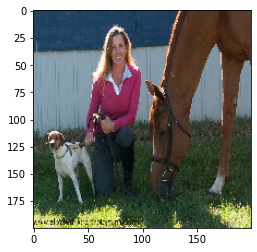

Top three  Person Horse Dog


In [ ]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(200,200))
  img = image.img_to_array(img)
  plt.imshow(img.astype('int32'))
  plt.show()
  prediction = model.predict(img.reshape(1,200,200,3))
  output = np.argsort(prediction)[0]
  print("Top three ",voc_classes[output[-1]],voc_classes[output[-2]],voc_classes[output[-3]])
  #return output



predict("wood-run-10-19-erin-14.jpg")

In [ ]:
voc_classes[14]

'Person'

In [ ]:
voc_classes[12]

'Horse'

In [ ]:
voc_classes[1]

'Bicycle'